# *** EDA Sistema de recomendación***

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk
import itertools

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alberto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [257]:
df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")

In [258]:
df.count()

title           42388
vote_average    42388
dtype: int64

In [259]:
df.columns

Index(['title', 'vote_average'], dtype='object')

In [260]:

plReco = df[["title", 'vote_average']][df['title'].str.contains("Robin")]
plReco = plReco.sort_values(by='vote_average', ascending= False)  
plReco.head(5)    

,title,vote_average
26213,The Court-Martial of Jackie Robinson,10
877,The Adventures of Robin Hood,7
24788,Robin Williams: Weapons of Self Destruction,7
949,Swiss Family Robinson,7
40709,Robin Williams: Live on Broadway,7


In [261]:
tex = "robin hood"
tex = tex.title()
tex

'Robin Hood'

In [262]:
def get_recommendation(titulo: str):
    df = pd.read_csv("./DataSet/movies_dataset_Para_EDA.csv")
    plReco = df[["title", 'vote_average']][df['title'].str.contains(f"{titulo.title()}")]
    plReco = plReco.sort_values(by="vote_average", ascending= False)  
    return plReco.head(5)

In [263]:
get_recommendation("robin")

,title,vote_average
26213,The Court-Martial of Jackie Robinson,10
877,The Adventures of Robin Hood,7
24788,Robin Williams: Weapons of Self Destruction,7
949,Swiss Family Robinson,7
40709,Robin Williams: Live on Broadway,7


## ***1- ANÁLISIS DE COLECCIÓN***

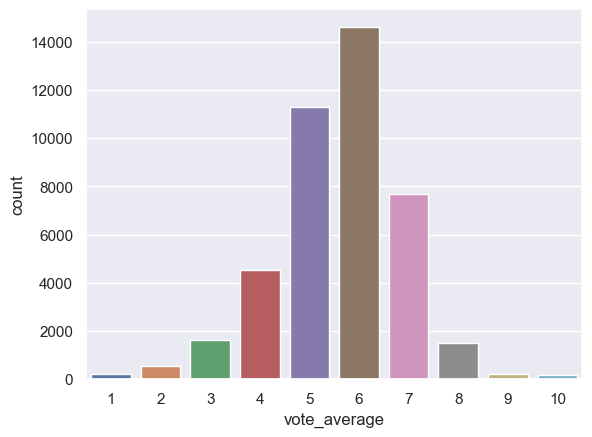

In [264]:
sns.countplot(x= "vote_average", data = df )
plt.show()

***

***

***

In [265]:
df.head()

,title,vote_average
0,Toy Story,7
1,Jumanji,6
2,Grumpier Old Men,6
3,Waiting to Exhale,6
4,Father of the Bride Part II,5


In [266]:
df.shape

(42388, 2)

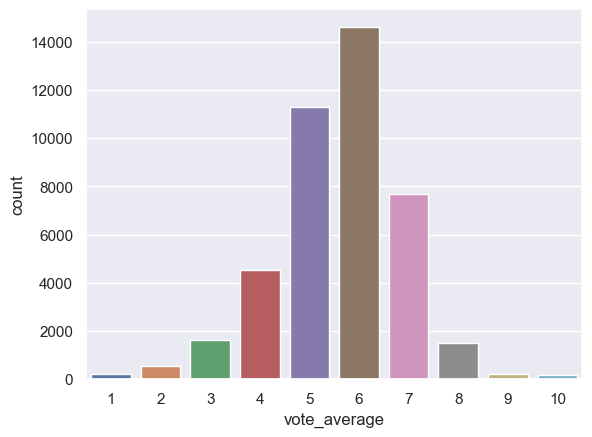

In [267]:
sns.countplot(x= "vote_average", data = df )
plt.show()

## ***2- Exploración de datos***

In [268]:
index_random_titulo_pelicula = np.random.randint(0, high= df.shape[0])
titulo_pelicula = df.iloc[index_random_titulo_pelicula].title
print(index_random_titulo_pelicula, titulo_pelicula)

15096 Dream Wife


In [269]:
print(index_random_titulo_pelicula, df.iloc[index_random_titulo_pelicula].vote_average)

15096 3


## ***3- NLTK***

In [270]:
## Tokenizr por palabras
titulo_wk = nltk.tokenize.word_tokenize(titulo_pelicula)
titulo_wk

['Dream', 'Wife']

In [271]:
## re Exprecion regular 
import re
titular_wt = nltk.tokenize.word_tokenize("El día de ayer fue el día más lluvioso del año!!.".lower())
re.sub("[^a-zA-Z!ñíá]"," ",str(titular_wt))

'  el    día    de    ayer    fue    el    día    más    lluvioso    del    año    !    !       '

### Normalizar

In [272]:
# Diccionario de palabras inutilies en ingles es 'english' en español es 'apanish'
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords
stopwords.append(":") # agregar una palabra inútil
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [273]:
titulo_wk

['Dream', 'Wife']

In [274]:
# Eliminar palabras inútiles
titulo_wk_sin_sw = [word for word in titulo_wk if word not in stopwords]
titulo_wk_sin_sw

['Dream', 'Wife']

In [275]:
titulo_wk = nltk.tokenize.word_tokenize(titulo_pelicula)
titulo_wk

['Dream', 'Wife']

## Normaliza el dataset completo

***

***

***

### Convertimos los títulos en listas de palabras

In [283]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords
stopwords.append("-")
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [284]:
# mascara
df_vote_average_7 = df[df.vote_average == 7]
df_vote_average_7.head()

,title,vote_average
0,Toy Story,7
5,Heat,7
12,Balto,7
13,Nixon,7
15,Casino,7


In [291]:
todos_titulos_vote_average_7 = []
for i in range(df_vote_average_7.shape[0]):
    titulo = df_vote_average_7.iloc[i].title
    titulo = re.sub("[^a-zA-Z!ñíá]"," ",str(titulo)).lower()
    titulo = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titulo)
    titulo = [word for word in titulo if word not in stopwords]
    titulo = [word for word in titulo if word not in filtrar]

    todos_titulos_vote_average_7.append(titulo)

In [294]:
todos_titulos_vote_average_7 = list(itertools.chain(*todos_titulos_vote_average_7))

In [295]:
# mostramos la palabras mas repetidas
freq_vote_average_7 = nltk.FreqDist(todos_titulos_vote_average_7)
freq_vote_average_7

FreqDist({'e': 10573, 'a': 8674, 'r': 7365, 'i': 7026, 'n': 6651, 'o': 6461, 's': 6368, 't': 6097, 'l': 5335, 'd': 3687, ...})

In [ ]:
# Creamos un dataframe con la freciuencia de palagra

https://www.students.soyhenry.com/classes/108?cohortId=116&videoOrdinal=2
31:16